In [3]:
### eine Beschreibung zusätzliche Beschreibung a  ###

import os
import pandas as pd

path = '../Data/'

all_files = os.listdir(path)
csv_files = [file for file in all_files if file.endswith('.csv')]

df = pd.concat((pd.read_csv(f'{path}/{file}') for file in csv_files))



In [2]:
pwd

'/Users/artannasradini/Programming/python_work/Jupyter-Tutorial'

In [4]:
len(csv_files)

12

In [35]:
for item in df['Wert in EUR'][0]:
    print(item)

10314,75
10186,05
4951,98
4951,98
3676,02
3676,02
2413,53
2455,94
2480,23
2475,23


In [5]:
####    Umwandlung der Spalte 'Wert in EUR' in Int64  ####

df_tmp = pd.to_numeric(df['Wert in EUR'].str.split(',').str[0])

df['Wert in EUR'] = df_tmp

df.reset_index(inplace=True)

In [10]:
#### Findet den passenden Index für die Teilsummen   ####

df_index_teilsummen = df[df['Produkt'] == 'CASH & CASH FUND & FTX CASH (EUR)']



In [18]:
### findet den passenden Index für die Teilsummen   ####

def index_teilsummen(df):
    df_tmp = df[df['Produkt'] == 'CASH & CASH FUND & FTX CASH (EUR)']
    return df_tmp

In [95]:
df_sorted = df.sort_values(by=['Wert in EUR'], ascending=False)

In [104]:
df_sorted.reset_index()['Wert in EUR'][0]

25592

In [11]:
df['Produkt'][80]

'THERMO FISHER SCIENTIF'

In [26]:
df['Wert in EUR'].sum()

2165490

In [11]:
df['Produkt'][0:40]

0      CASH & CASH FUND & FTX CASH (EUR)
1      CASH & CASH FUND & FTX CASH (SEK)
2                           2G ENERGY AG
3                 ABBOTT LABORATORIES CO
4     ACADEMY SPORTS AND OUTDOORS INC...
5                 ACCENTURE PLC. CLASS A
6                              ADESSO AG
7                              ADIDAS AG
8                                  ADYEN
9                             ALLIANZ SE
10                            AMUNDI AIW
11                 ARTHUR J. GALLAGHER &
12                          ASML HOLDING
13            ATLASSIAN CORP PLC-CLASS A
14                     ATOSS SOFTWARE AG
15                AVANZA BANK HOLDING AB
16                BANK NOVA SCOTIA HALIF
17                       BEYOND MEAT INC
18                 CARL ZEISS MEDITEC AG
19                 CHEGG INC. COMMON STO
20                            CLIMEON AB
21                       CLIQ DIGITAL AG
22                CME GROUP INC. - CLASS
23          COINBASE GLOBAL INC -CLASS A
24              

In [34]:
df['Wert in EUR'][0:40].sum()

142602

In [35]:
df['Wert in EUR'][40:80].sum()

143080

In [36]:
df['Wert in EUR'][40:80].sum()/df['Wert in EUR'][0:40].sum()

1.0033519866481535

In [12]:
df_index_teilsummen.index

Int64Index([0, 111, 207, 274, 428, 495, 594, 732, 827, 924, 1113, 1232], dtype='int64')

In [13]:
index = 0
for item in df_tmp1.index:
    print(df['Wert in EUR'][item:df_tmp1.index[index + 1]].sum())
    index += 1
    if index + 1 == len(df_tmp1):
        break

NameError: name 'df_tmp1' is not defined

In [56]:
df_sume = []
sume = 0

In [57]:
#####    Muss eine Funktion sein, Berechnung der Teilsummen ####

index = 0
for item in df_tmp1.index:
    sume = df['Wert in EUR'][item:df_tmp1.index[index + 1]].sum()
    df_sume.append(sume)
    index += 1
    if index + 1 == len(df_tmp1):
        break

In [16]:
def teilsumme(data):
    index = 0
    sume = 0
    df_sume = []
    for item in data.index:
        sume = df['Wert in EUR'][item:data.index[index + 1]].sum()
        df_sume.append(sume)
        index += 1
        if index + 1 == len(data):
            break
    return df_sume

In [19]:
teilsumme(index_teilsummen(df))

[246766,
 237375,
 212067,
 276776,
 213065,
 237215,
 269083,
 229450,
 225758,
 289556,
 249787]

In [21]:
import matplotlib.pyplot as plt

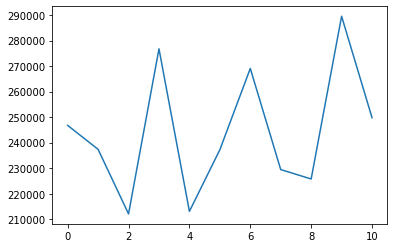

In [22]:
plt.plot(teilsumme(index_teilsummen(df)))
plt.show()